<a href="https://colab.research.google.com/github/mflavioep/UnivespPJI410/blob/main/PJI410_Notebook_01_An%C3%A1lise_obten%C3%A7%C3%A3o_e_cria%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***NOTEBOOK 01 - Análise, obtenção e criação dos dados brutos.***

*   DATA: 28/05/2023
*   Arquivo: PJI410 Notebook 01 - Análise obtenção e criação de dados.ipynb
*   Disponível em: https://github.com/mflavioep/UnivespPJI410



**UNIVERSIDADE VIRTUAL DO ESTADO DE SÃO PAULO**

**Disciplina:** Projeto Integrador em Computação IV 

**Tema:** Controle de rotatividade de estacionamento de estabelecimento comercial com promoções integradas com Inteligência Artificial agregada. 

**Integrantes:**
*   Goldenberg Ferreira Vieira, RA: 2006475
*   Marcos Chiorato, RA: 2001027
*   Marcos Flávio Eli Pereira, RA: 2012284 
*   William Domingos da Silva, RA: 2009717

**Polos:** Americana, Jaguariúna, Várzea Paulista,Sumaré

**Orientador do PI:** Lucas Campos Ferreira 

**GERAÇÃO DE DADOS PARA SIMULAÇÃO**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


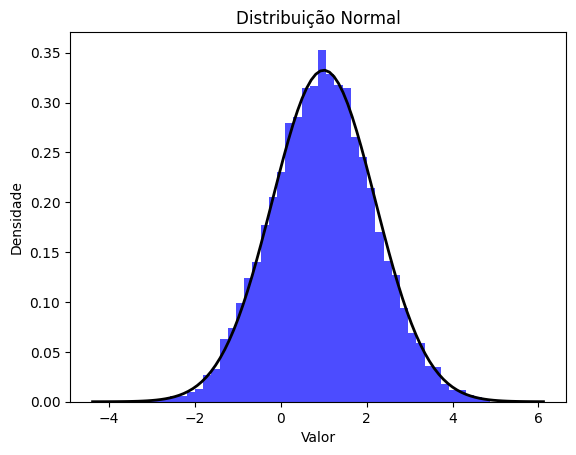

In [ ]:
# Exemplo de distribuição normal

import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros da distribuição normal
mu = 1  # média
sigma = 1.2  # desvio padrão
num_amostras = 10000  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

# Plotar um histograma da amostra de dados
plt.hist(amostra, bins=50, density=True, alpha=0.7, color='blue')

# Plotar a curva da distribuição normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
plt.plot(x, pdf, 'k', linewidth=2)

# Personalizar o gráfico
plt.title('Distribuição Normal')
plt.xlabel('Valor')
plt.ylabel('Densidade')
plt.show()


In [ ]:
len(amostra)

10000

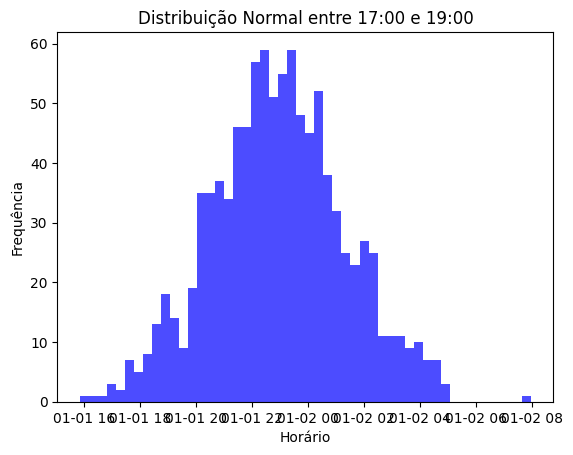

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Definir as horas de início e término
hora_inicio = datetime.strptime('08:00', '%H:%M')
hora_fim = datetime.strptime('22:00', '%H:%M')

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/6  # desvio padrão
num_amostras = 1000  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:
    hora = hora_inicio + timedelta(hours=valor)
    amostra_horas.append(hora)
    #print(hora)

# Plotar um histograma da amostra de dados
plt.hist(amostra_horas, bins=50, alpha=0.7, color='blue')

# Personalizar o gráfico
plt.title('Distribuição Normal entre 17:00 e 19:00')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()


In [ ]:
hora_inicio

datetime.datetime(1900, 1, 1, 8, 0)

In [ ]:
print(datetime(2022, 12, 31, 17, 0))

2022-12-31 17:00:00


Estudo e criação dos dados de simulação de uso de um estacionamento
*   Número de vagas: 200
*   Seguindo os dados de frequência do Carrefour Campinas (Google Maps)


In [ ]:
# Bibliotecas utilizadas
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Gerando base de horarios de entrada randomicos e uniformes

In [ ]:
# Neste caso a intensão é fornecer uma base de horários randômica e uniforme
# contempla todo o expediente do estabelecimento

dia = 13

# Definir as horas de início e término
hora_inicio = datetime(2023, 3, dia, 7, 0)
hora_fim = datetime(2023, 3, dia, 22, 0)

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

print(hora_inicio_decimal)

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/12  # desvio padrão
num_amostras = 1000  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.uniform(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:    
      hora = hora_inicio + timedelta(hours=valor)
      amostra_horas.append(hora)



7.0


In [ ]:
horas_index = []
horas_count = []
horas_index = list(range(7,23))
horas_count = list(0 for i in range(7,23))

deslocamento = -7

print(horas_index)
print(horas_count)

for i in amostra_horas:
   horas_count[i.hour + deslocamento] = horas_count[i.hour + deslocamento] + 1
   
print(horas_index)
print(horas_count)

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
[0, 58, 81, 55, 88, 87, 74, 86, 65, 80, 69, 77, 77, 70, 33, 0]


In [ ]:
amostra_horas[0].strftime("%Y-%m-%d %H:%M")

'2023-03-13 13:57'

In [ ]:
a = ['Horários Uniformes']

for j in amostra_horas:
  a.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_Uniformes.csv'
#with open(PJI410_DADOS_Uniformes, 'w') as f:
#  write = csv.writer(f)
#  write.writerows(a)

np.savetxt(PJI410_DADOS_Uniformes, 
           a,
           delimiter =",", 
           fmt ='%s')

print(a)

['Horários Uniformes', '2023-03-13 13:57', '2023-03-13 12:02', '2023-03-13 19:22', '2023-03-13 12:21', '2023-03-13 09:01', '2023-03-13 18:23', '2023-03-13 16:04', '2023-03-13 12:04', '2023-03-13 12:52', '2023-03-13 18:50', '2023-03-13 12:00', '2023-03-13 11:03', '2023-03-13 21:16', '2023-03-13 15:01', '2023-03-13 18:13', '2023-03-13 09:16', '2023-03-13 17:35', '2023-03-13 16:23', '2023-03-13 10:51', '2023-03-13 17:57', '2023-03-13 11:19', '2023-03-13 08:19', '2023-03-13 09:06', '2023-03-13 11:03', '2023-03-13 10:01', '2023-03-13 12:23', '2023-03-13 20:10', '2023-03-13 16:03', '2023-03-13 19:59', '2023-03-13 20:06', '2023-03-13 13:29', '2023-03-13 14:33', '2023-03-13 08:47', '2023-03-13 16:44', '2023-03-13 21:00', '2023-03-13 20:17', '2023-03-13 11:14', '2023-03-13 11:04', '2023-03-13 16:51', '2023-03-13 12:07', '2023-03-13 08:58', '2023-03-13 12:25', '2023-03-13 14:49', '2023-03-13 08:33', '2023-03-13 14:40', '2023-03-13 20:57', '2023-03-13 09:31', '2023-03-13 19:10', '2023-03-13 10:45

# Dados gerados

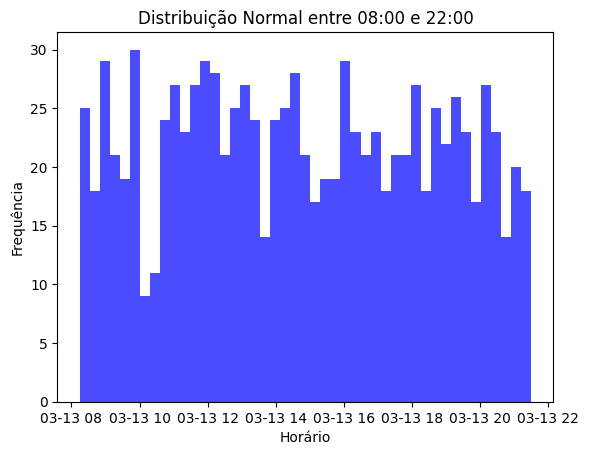

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(amostra_horas, bins=45, alpha=0.7, color='blue')

# Personalizar o gráfico
plt.title('Distribuição Normal entre 08:00 e 22:00')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

# segunda-feira

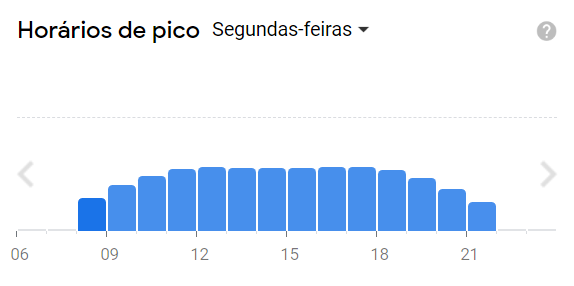


In [ ]:
segunda_feira = amostra_horas[:]
len(segunda_feira)

1000

Na segunda-feira é possível observar dois picos 12:00-13:00 e 17:00-18:00

PICO 1

In [ ]:
# Gerando dados para segunda-feira dia 13/03/2023

# A ídeia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado na segunda-feira pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('11:00', '%H:%M')
hora_fim = datetime.strptime('14:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 200  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)
dia = 13


In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 11.0
Hora fim.....: 14.0
Média........: 12.5
Sigma........: 1.5
Elementos....: 200


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
# amostra_horas = []
for valor in amostra:
    #print(int(str(timedelta(hours=valor))[0:1]))
    #print(valor, str(timedelta(hours=valor))[0:2], str(timedelta(hours=valor))[3:5])
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    #print(hora)
    segunda_feira.append(hora)

PICO 2

In [ ]:
# Gerando dados para segunda-feira dia 13/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado na segunda-feira pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('16:00', '%H:%M')
hora_fim = datetime.strptime('19:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 200  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)
dia = 13


In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 16.0
Hora fim.....: 19.0
Média........: 17.5
Sigma........: 1.5
Elementos....: 200


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
# amostra_horas = []
for valor in amostra:
    #print(int(str(timedelta(hours=valor))[0:1]))
    #print(valor, str(timedelta(hours=valor))[0:2], str(timedelta(hours=valor))[3:5])
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    #print(hora)
    segunda_feira.append(hora)

In [ ]:
segunda_feira.sort()

In [ ]:
len(segunda_feira)

1273

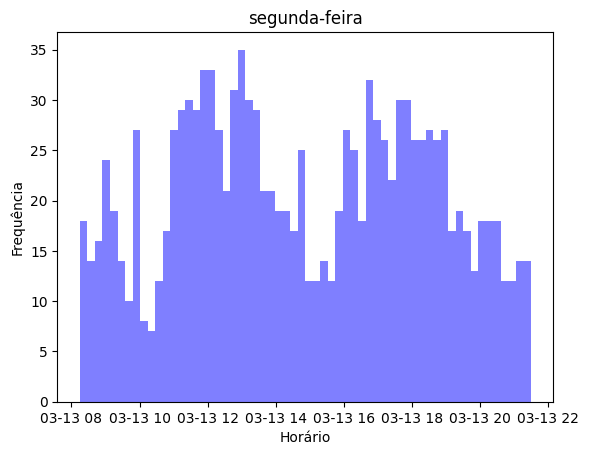

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(segunda_feira, bins=60, alpha=0.5, color='blue')

# Personalizar o gráfico
plt.title('segunda-feira')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# Salvando dados no arquivo CSV
arq = ['Horários Uniformes']

for j in segunda_feira:
  arq.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_segunda.csv'

np.savetxt(PJI410_DADOS_Uniformes, 
           arq,
           delimiter =",", 
           fmt ='%s')

# terça-feira

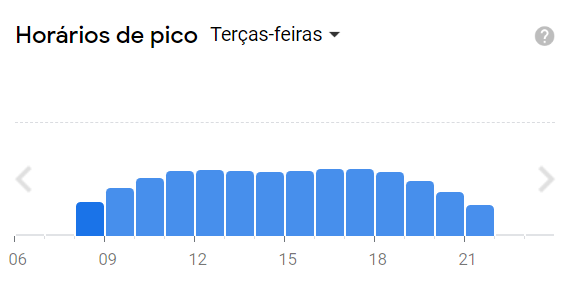


In [ ]:
# Neste caso a intensão é fornecer uma base de horários randômica e uniforme
# contempla todo o expediente do estabelecimento

dia = 14

# Definir as horas de início e término
hora_inicio = datetime(2023, 3, dia, 7, 0)
hora_fim = datetime(2023, 3, dia, 22, 0)

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

print(hora_inicio_decimal)

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/12  # desvio padrão
num_amostras = 1000  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.uniform(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:    
      hora = hora_inicio + timedelta(hours=valor)
      amostra_horas.append(hora)



7.0


In [ ]:
terca_feira = amostra_horas[:]
len(terca_feira)

1000

Na terça-feira é possível observar dois picos 11:00-13:00 e 16:00-17:00

PICO 1

In [ ]:
# Gerando dados para terça-feira dia 14/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado na segunda-feira pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('10:00', '%H:%M')
hora_fim = datetime.strptime('15:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 250  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)
dia = 14


In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 10.0
Hora fim.....: 15.0
Média........: 12.5
Sigma........: 1.5
Elementos....: 250


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
# amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
# amostra_horas = []
for valor in amostra:
    #print(int(str(timedelta(hours=valor))[0:1]))
    #print(valor, str(timedelta(hours=valor))[0:2], str(timedelta(hours=valor))[3:5])
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    #print(hora)
    terca_feira.append(hora)

PICO 2

In [ ]:
# Gerando dados para terça-feira dia 14/03/2023

# A ídeia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado na segunda-feira pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('15:00', '%H:%M')
hora_fim = datetime.strptime('18:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 250  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)
dia = 14


In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 15.0
Hora fim.....: 18.0
Média........: 16.5
Sigma........: 1.5
Elementos....: 250


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
# amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
# amostra_horas = []
for valor in amostra:
    #print(int(str(timedelta(hours=valor))[0:1]))
    #print(valor, str(timedelta(hours=valor))[0:2], str(timedelta(hours=valor))[3:5])
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    #print(hora)
    terca_feira.append(hora)

In [ ]:
terca_feira.sort()

In [ ]:
len(terca_feira)

1500

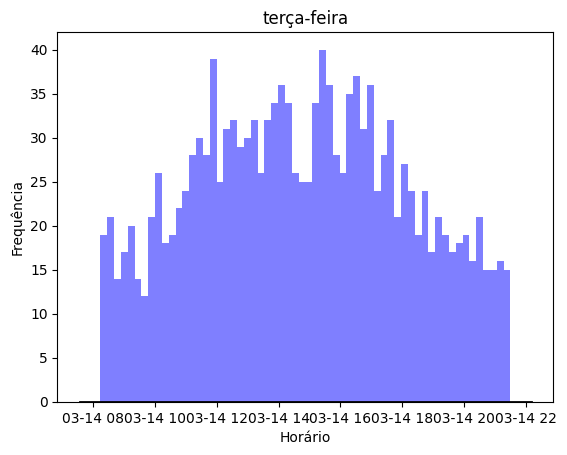

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(terca_feira, bins=60, alpha=0.5, color='blue')

# Plotar a curva da distribuição normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
plt.plot(x, pdf, 'k', linewidth=2)

# Personalizar o gráfico
plt.title('terça-feira')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Salvando dados no arquivo CSV
arq = ['Horários Uniformes']

for j in terca_feira:
  arq.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_terca.csv'

np.savetxt(PJI410_DADOS_Uniformes, 
           arq,
           delimiter =",", 
           fmt ='%s')

# quarta-feira

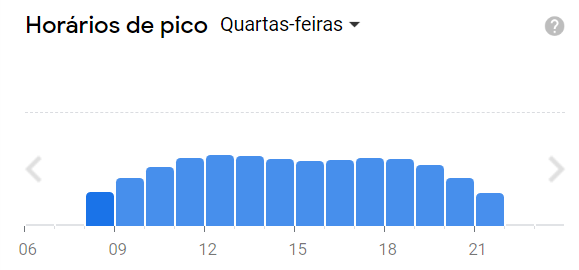



In [ ]:
# Neste caso a intensão é fornecer uma base de horários randômica e uniforme
# contempla todo o expediente do estabelecimento

dia = 15

# Definir as horas de início e término
hora_inicio = datetime(2023, 3, dia, 7, 0)
hora_fim = datetime(2023, 3, dia, 22, 0)

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

print(hora_inicio_decimal)

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/12  # desvio padrão
num_amostras = 1000  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.uniform(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:    
      hora = hora_inicio + timedelta(hours=valor)
      amostra_horas.append(hora)



7.0


In [ ]:
quarta_feira = amostra_horas[:]
len(quarta_feira)

1000

Na quarta-feira é possível observar dois picos 12:00-13:00 e 17:00-18:00

PICO 1

In [ ]:
# Gerando dados para quarta-feira dia 15/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('12:00', '%H:%M')
hora_fim = datetime.strptime('13:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = .5  # desvio padrão
num_amostras = 230  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 12.0
Hora fim.....: 13.0
Média........: 12.5
Sigma........: 0.5
Elementos....: 230


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
# amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    quarta_feira.append(hora)

PICO 2

In [ ]:
# Gerando dados para quarta-feira dia 15/03/2023

# A ídeia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('17:00', '%H:%M')
hora_fim = datetime.strptime('18:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 220  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 17.0
Hora fim.....: 18.0
Média........: 17.5
Sigma........: 1.5
Elementos....: 220


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
# amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
# amostra_horas = []
for valor in amostra:
    #print(int(str(timedelta(hours=valor))[0:1]))
    #print(valor, str(timedelta(hours=valor))[0:2], str(timedelta(hours=valor))[3:5])
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    #print(hora)
    quarta_feira.append(hora)

In [ ]:
quarta_feira.sort()

In [ ]:
len(quarta_feira)

1450

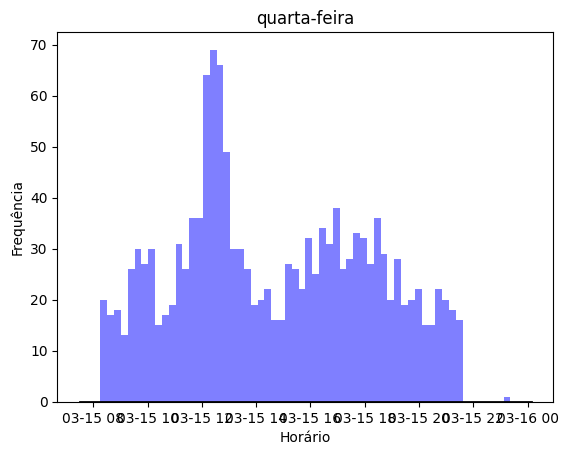

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(quarta_feira, bins=60, alpha=0.5, color='blue')

# Plotar a curva da distribuição normal teórica
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
plt.plot(x, pdf, 'k', linewidth=2)

# Personalizar o gráfico
plt.title('quarta-feira')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Salvando dados no arquivo CSV
arq = ['Horários Uniformes']

for j in quarta_feira:
  arq.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_quarta.csv'

np.savetxt(PJI410_DADOS_Uniformes, 
           arq,
           delimiter =",", 
           fmt ='%s')

# quinta-feira

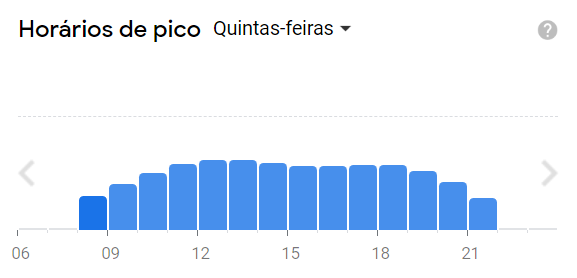


In [ ]:
# Neste caso a intensão é fornecer uma base de horários randômica e uniforme
# contempla todo o expediente do estabelecimento

dia = 16

# Definir as horas de início e término
hora_inicio = datetime(2023, 3, dia, 7, 0)
hora_fim = datetime(2023, 3, dia, 22, 0)

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

print(hora_inicio_decimal)

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/12  # desvio padrão
num_amostras = 1000  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.uniform(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:    
      hora = hora_inicio + timedelta(hours=valor)
      amostra_horas.append(hora)



7.0


In [ ]:
quinta_feira = amostra_horas[:]
len(quinta_feira)

1000

Na quinta-feira é possível observar um horário de pico 12:00-14:00

PICO 1

In [ ]:
# Gerando dados para quinta-feira dia 16/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('12:00', '%H:%M')
hora_fim = datetime.strptime('14:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 300  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 12.0
Hora fim.....: 14.0
Média........: 13.0
Sigma........: 1.5
Elementos....: 300


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
# amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    quinta_feira.append(hora)

In [ ]:
quinta_feira.sort()

In [ ]:
len(quinta_feira)

1300

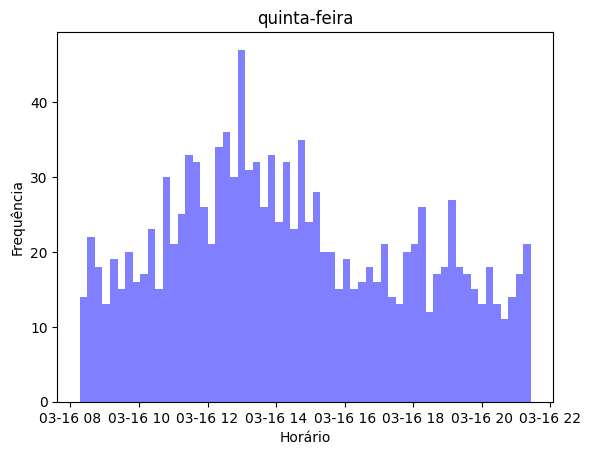

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(quinta_feira, bins=60, alpha=0.5, color='blue')

# Personalizar o gráfico
plt.title('quinta-feira')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Salvando dados no arquivo CSV
arq = ['Horários Uniformes']

for j in quinta_feira:
  arq.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_quinta.csv'

np.savetxt(PJI410_DADOS_Uniformes, 
           arq,
           delimiter =",", 
           fmt ='%s')

# sexta-feira

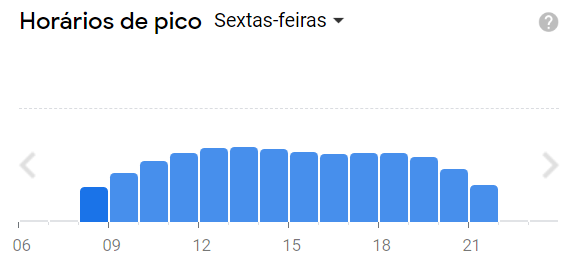

In [ ]:
# Neste caso a intensão é fornecer uma base de horários randômica e uniforme
# contempla todo o expediente do estabelecimento

dia = 17

# Definir as horas de início e término
hora_inicio = datetime(2023, 3, dia, 7, 0)
hora_fim = datetime(2023, 3, dia, 22, 0)

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

print(hora_inicio_decimal)

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/12  # desvio padrão
num_amostras = 1200  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.uniform(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:    
      hora = hora_inicio + timedelta(hours=valor)
      amostra_horas.append(hora)



7.0


In [ ]:
sexta_feira = amostra_horas[:]
len(sexta_feira)

1200

Na sexta-feira é possível observar um horário de pico 12:00-14:00

PICO 1

In [ ]:
# Gerando dados para sexta-feira dia 17/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('12:00', '%H:%M')
hora_fim = datetime.strptime('14:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 200  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

In [ ]:
print("Hora início..:", hora_inicio_decimal)
print("Hora fim.....:", hora_fim_decimal)
print("Média........:", mu)
print("Sigma........:", sigma)
print("Elementos....:", len(amostra))

Hora início..: 12.0
Hora fim.....: 14.0
Média........: 13.0
Sigma........: 1.5
Elementos....: 200


In [ ]:
# Pelo fato do Sigma (Desvio padrão) pode ocorrer da amostra aleatória gerar valores maiores que hora_fim_decimal e menores que hora_inicio_decimal
# assim usamos o recurso de compressão de lista do Python 3 para remover tais valores.
# amostra = [x for x in amostra if hora_inicio_decimal <= x <= hora_fim_decimal]

In [ ]:
# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    sexta_feira.append(hora)

In [ ]:
sexta_feira.sort()

In [ ]:
len(sexta_feira)

1400

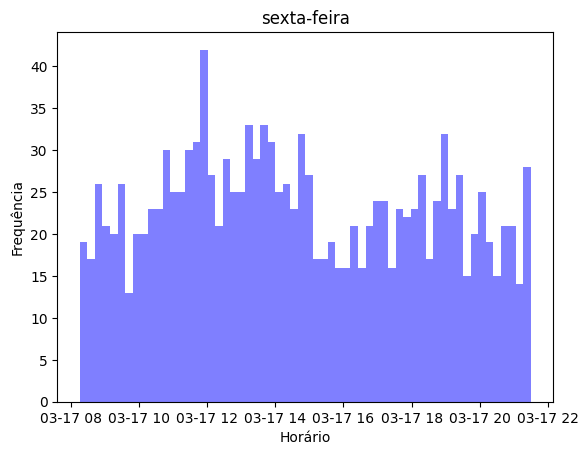

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(sexta_feira, bins=60, alpha=0.5, color='blue')

# Personalizar o gráfico
plt.title('sexta-feira')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Salvando dados no arquivo CSV
arq = ['Horários Uniformes']

for j in sexta_feira:
  arq.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_sexta.csv'

np.savetxt(PJI410_DADOS_Uniformes, 
           arq,
           delimiter =",", 
           fmt ='%s')

# sábado

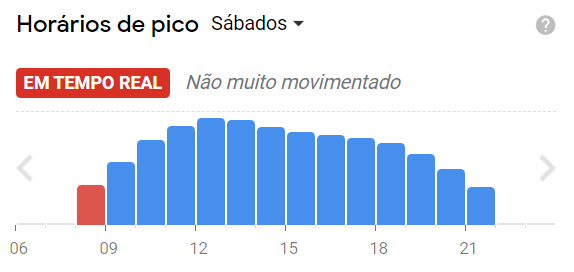



In [ ]:
# Neste caso a intensão é fornecer uma base de horários randômica e uniforme
# contempla todo o expediente do estabelecimento

dia = 18

# Definir as horas de início e término
hora_inicio = datetime(2023, 3, dia, 7, 0)
hora_fim = datetime(2023, 3, dia, 22, 0)

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

print(hora_inicio_decimal)

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/12  # desvio padrão
num_amostras = 1500  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.uniform(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:    
      hora = hora_inicio + timedelta(hours=valor)
      amostra_horas.append(hora)



7.0


In [ ]:
sabado = amostra_horas[:]
len(sabado)

1500

No sábado é possível observar um horário de pico as 12:00

PICO 1

In [ ]:
# Gerando dados para sábado dia 18/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('08:00', '%H:%M')
hora_fim = datetime.strptime('16:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 300  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    sabado.append(hora)

In [ ]:
# Gerando dados para sábado dia 18/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('15:00', '%H:%M')
hora_fim = datetime.strptime('21:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 200  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    sabado.append(hora)

In [ ]:
# Gerando dados para sábado dia 18/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('11:00', '%H:%M')
hora_fim = datetime.strptime('22:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 50  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    sabado.append(hora)

In [ ]:
sabado.sort()

In [ ]:
len(sabado)

2050

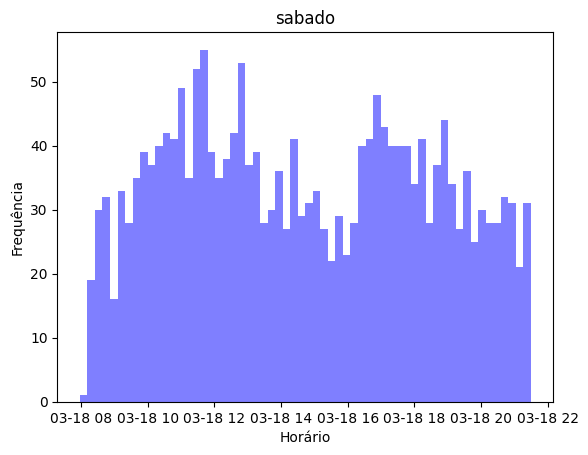

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(sabado, bins=60, alpha=0.5, color='blue')

# Personalizar o gráfico
plt.title('sabado')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Salvando dados no arquivo CSV
arq = ['Horários Uniformes']

for j in sabado:
  arq.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_sabado.csv'

np.savetxt(PJI410_DADOS_Uniformes, 
           arq,
           delimiter =",", 
           fmt ='%s')

# domingo

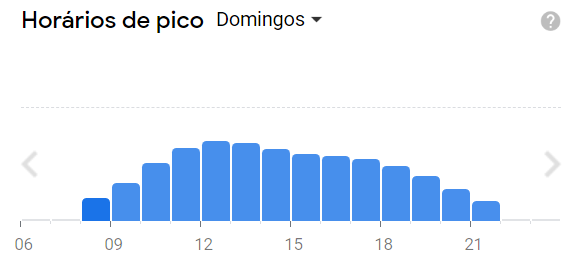

In [ ]:
# Neste caso a intensão é fornecer uma base de horários randômica e uniforme
# contempla todo o expediente do estabelecimento

dia = 19

# Definir as horas de início e término
hora_inicio = datetime(2023, 3, dia, 7, 0)
hora_fim = datetime(2023, 3, dia, 22, 0)

# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

print(hora_inicio_decimal)

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
sigma = (hora_fim_decimal - hora_inicio_decimal)/12  # desvio padrão
num_amostras = 800  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.uniform(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
amostra_horas = []
for valor in amostra:    
      hora = hora_inicio + timedelta(hours=valor)
      amostra_horas.append(hora)



7.0


In [ ]:
domingo = amostra_horas[:]
len(domingo)

800

No domingo é possível observar um horário de pico as 12:00

PICO 1

In [ ]:
# Gerando dados para domingo dia 19/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('08:00', '%H:%M')
hora_fim = datetime.strptime('20:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 50  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    domingo.append(hora)

In [ ]:
# Gerando dados para domingo dia 19/03/2023

# A idéia é inserir dados na amostra original (amostra_horas) de modo a simular o horário de pico registrado pelo Google Maps
# Sempre vamos inserir uma amostra normalizada de forma a simular a curva observada.

# Definir as horas de início e término
hora_inicio = datetime.strptime('09:00', '%H:%M')
hora_fim = datetime.strptime('17:00', '%H:%M')


# Converter as horas em decimal
hora_inicio_decimal = hora_inicio.hour + hora_inicio.minute/60
hora_fim_decimal = hora_fim.hour + hora_fim.minute/60

# Definir parâmetros da distribuição normal
mu = (hora_inicio_decimal + hora_fim_decimal)/2  # média
# sigma = (hora_fim_decimal - hora_inicio_decimal)/5  # desvio padrão
sigma = 1.5  # desvio padrão
num_amostras = 100  # número de amostras

# Criar uma amostra de dados aleatórios com distribuição normal
amostra = np.random.normal(mu, sigma, num_amostras)

# Transformar os valores da amostra em horas no formato datetime
for valor in amostra:
    if(int(str(timedelta(hours=valor))[0:1])>2):
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:1]), int(str(timedelta(hours=valor))[2:4]))
    else:
      hora = datetime(2023, 3, dia, int(str(timedelta(hours=valor))[0:2]), int(str(timedelta(hours=valor))[3:5]))
    domingo.append(hora)

In [ ]:
domingo.sort()

In [ ]:
len(domingo)

950

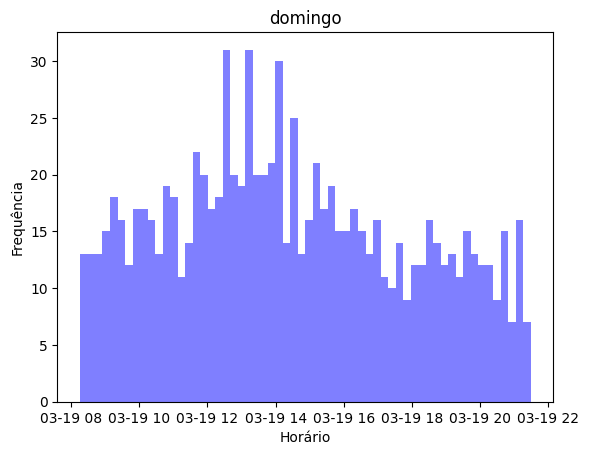

In [ ]:
# Plotar um histograma da amostra de dados
plt.hist(domingo, bins=60, alpha=0.5, color='blue')

# Personalizar o gráfico
plt.title('domingo')
plt.xlabel('Horário')
plt.ylabel('Frequência')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Salvando dados no arquivo CSV
arq = ['Horários Uniformes']

for j in domingo:
  arq.append(j.strftime("%Y-%m-%d %H:%M"))
PJI410_DADOS_Uniformes = '/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS_domingo.csv'

np.savetxt(PJI410_DADOS_Uniformes, 
           arq,
           delimiter =",", 
           fmt ='%s')

# Ajustando os tempos de permanência

In [ ]:
# Utilizando o Pandas para concatenar as lista e transformar em DataFrames
import pandas as pd

df_2 = pd.DataFrame(segunda_feira) 
df_3 = pd.DataFrame(terca_feira) 
df_4 = pd.DataFrame(quarta_feira) 
df_5 = pd.DataFrame(quinta_feira) 
df_6 = pd.DataFrame(sexta_feira) 
df_7 = pd.DataFrame(sabado) 
df_1 = pd.DataFrame(domingo) 


In [ ]:
df = pd.concat([df_2,df_3,df_4,df_5,df_6,df_7,df_1])

In [ ]:
len(df.axes[0])

9923

In [ ]:
df.rename(columns = {0:'hora_entrada'}, inplace = True)
#df["permanencia"] = np.nan
df["permanencia"] = np.int64(np.random.normal(18, 10, len(df.axes[0])))

In [ ]:
df.head(10)

,hora_entrada,permanencia
0,2023-03-13 08:15:03.125890,8
1,2023-03-13 08:15:56.828889,20
2,2023-03-13 08:17:34.879699,-1
3,2023-03-13 08:17:43.397389,15
4,2023-03-13 08:18:23.504707,18
5,2023-03-13 08:18:26.604436,11
6,2023-03-13 08:19:28.080251,17
7,2023-03-13 08:19:54.998022,30
8,2023-03-13 08:20:50.448296,9
9,2023-03-13 08:20:51.299927,31


In [ ]:
df.describe()

,permanencia
count,9923.000000
mean,17.568880
std,10.083444
min,-24.000000
25%,11.000000
50%,18.000000
75%,24.000000
max,58.000000


In [ ]:
df = df[~(df['permanencia'] < 0)]

In [ ]:
rng = np.random.default_rng()
df['permanencia'] = df['permanencia'] + rng.integers(5, high=10, size=len(df.axes[0]))

In [ ]:
df.dtypes

hora_entrada    datetime64[ns]
permanencia              int64
dtype: object

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Univesp/PJI410_DADOS.csv',index=False)